# Demo 3: Load the trained cnn model with different hyperparameters

In this demo we will loading 4 trained models:
## Model 1: 
-   Input shape: (224,224,1)
-   Two convolutionals:
    -   First convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
    -   Second convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
## Model 2:
-   Input shape: (640,640,1)
-   Two convolutionals:
    -   First convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
    -   Second convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
## Model 3:
-   Input shape: (640,640,1)
-   Two convolutionals:
    -   First convolutional: Kernel_size = (5,5), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
    -   Second convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)
## Model 4:
-   Input shape: (640,640,1)
-   Two convolutionals:
    -   First convolutional: Kernel_size = (5,5), Stride = (2,2), Activation function: ReLu, MaxPooling: size = (2,2)
    -   Second convolutional: Kernel_size = (3,3), Stride = (1,1), Activation function: ReLu, MaxPooling: size = (2,2)

Tasks Outlines:

## 0. Task 0: Preparing dataset
## 1. Task 1: Loading the trained models
## 2. Taks 2: Showing the feature images which is obtained under the convolutional layers

## Import all packages

In [48]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.utils import to_categorical

## 0. Task 0: Preparing Dataset
### 0.1. Define a function get all paths to each image in the dataset and the class label of each image

In [10]:
def get_all_img_label_path(input_dir:str,
                            img_suffix = '.bmp')->(list,list):
    """
    parameters:
    -   input_dir: the directory to the data folder
    -   img_suffix: siffix type of image in the data folder to read
    output: a tuple of two lists:
    -   List of all path to each image in the data folder
    -   List of relative class for each image in the data folder
    """
    label_to_number = {"Good":0,"A1":1}
    list_img_paths = []
    list_labels = []
    for root,dirs,files in os.walk(input_dir):
        for file in files:
            file_path = os.path.join(root,file)

            file_name,file_suffix = os.path.splitext(file)
            if file_suffix == img_suffix:
                list_img_paths.append(file_path)
                folder_name = os.path.basename(os.path.dirname(file_path))
                list_labels.append(label_to_number[folder_name])
    return (list_img_paths,list_labels)

### 0.2. Define a function to get all image array and its class label (which are in type np.array)
In this function we also resize the all image to the same new size = (width, height)

In [11]:
# Resize the image to small dimensional of width and height
def get_data(list_img_paths:list,
             list_labels:list,
             is_resize:bool= True,
             width:int = 32,
             height:int = 32) -> (np.array,np.array):
    """
    Parameters:
    -   list_img_paths: List of all paths to image in the data folder
    -   list_labels: The list of labels relative to each image in the list_img_paths
    -   is_resize: Default is True means resize all image in the dataset
        to the new size (width,height)
    -   width: The width size which we want to resize to
    -   height: The height size which we want to resize to

    Output: A tuple of two arrays
    -   data_array with shape (N,h,w), where
        -   N is the number of image
        -   h is the height
        -   w is the width
    -   label_array with shape (N,)
    """
    data = []
    for i in range(len(list_img_paths)):
        path_img = list_img_paths[i]
        img = Image.open(path_img).convert('L')
        if is_resize:
            img = img.resize(size = (width,height),
                            resample=Image.BICUBIC)
        data.append(np.array(img))
    return (np.array(data),np.array(list_labels))

### 0.3. Getting data by using two previouse function

In [12]:
# Get the list images path and list labels of test and visualize
data_dir = "/Users/user/Victor2023/Dataset/Data_CNN" # Replace this directory by the directory to data in your computer
test_dir = os.path.join(data_dir,"Test")
list_imgs_test,list_labels_test = get_all_img_label_path(input_dir=test_dir,
                                                    img_suffix='.bmp')

In [13]:
# Prepare test data for the model 1: input shape = (224,224,1)
width_1 = 224
height_1 = 224
n_channels = 1
X_test_1,label_test_1 = get_data(list_img_paths=list_imgs_test,
               list_labels=list_labels_test,
               is_resize=True,
               width=width_1,
               height= height_1)
# Reshape to the standard form
n_test_1 = X_test_1.shape[0]
X_test_1 = X_test_1.reshape((n_test_1,height_1,width_1,n_channels))
X_test_1 = X_test_1/255
y_test_1 = to_categorical(label_test_1)

In [14]:
# Prepare test data for the model 2,3,4: input shape = (640,640,1)
width_2 = 640
height_2 = 640
X_test_2,label_test_2 = get_data(list_img_paths=list_imgs_test,
               list_labels=list_labels_test,
               is_resize=True,
               width=width_2,
               height= height_2)

# Reshape to the standard form
n_test_2 = X_test_2.shape[0]
X_test_2 = X_test_2.reshape((n_test_2,height_2,width_2,n_channels))
X_test_2 = X_test_2/255
y_test_2 = to_categorical(label_test_2)


Show the images in the test set:


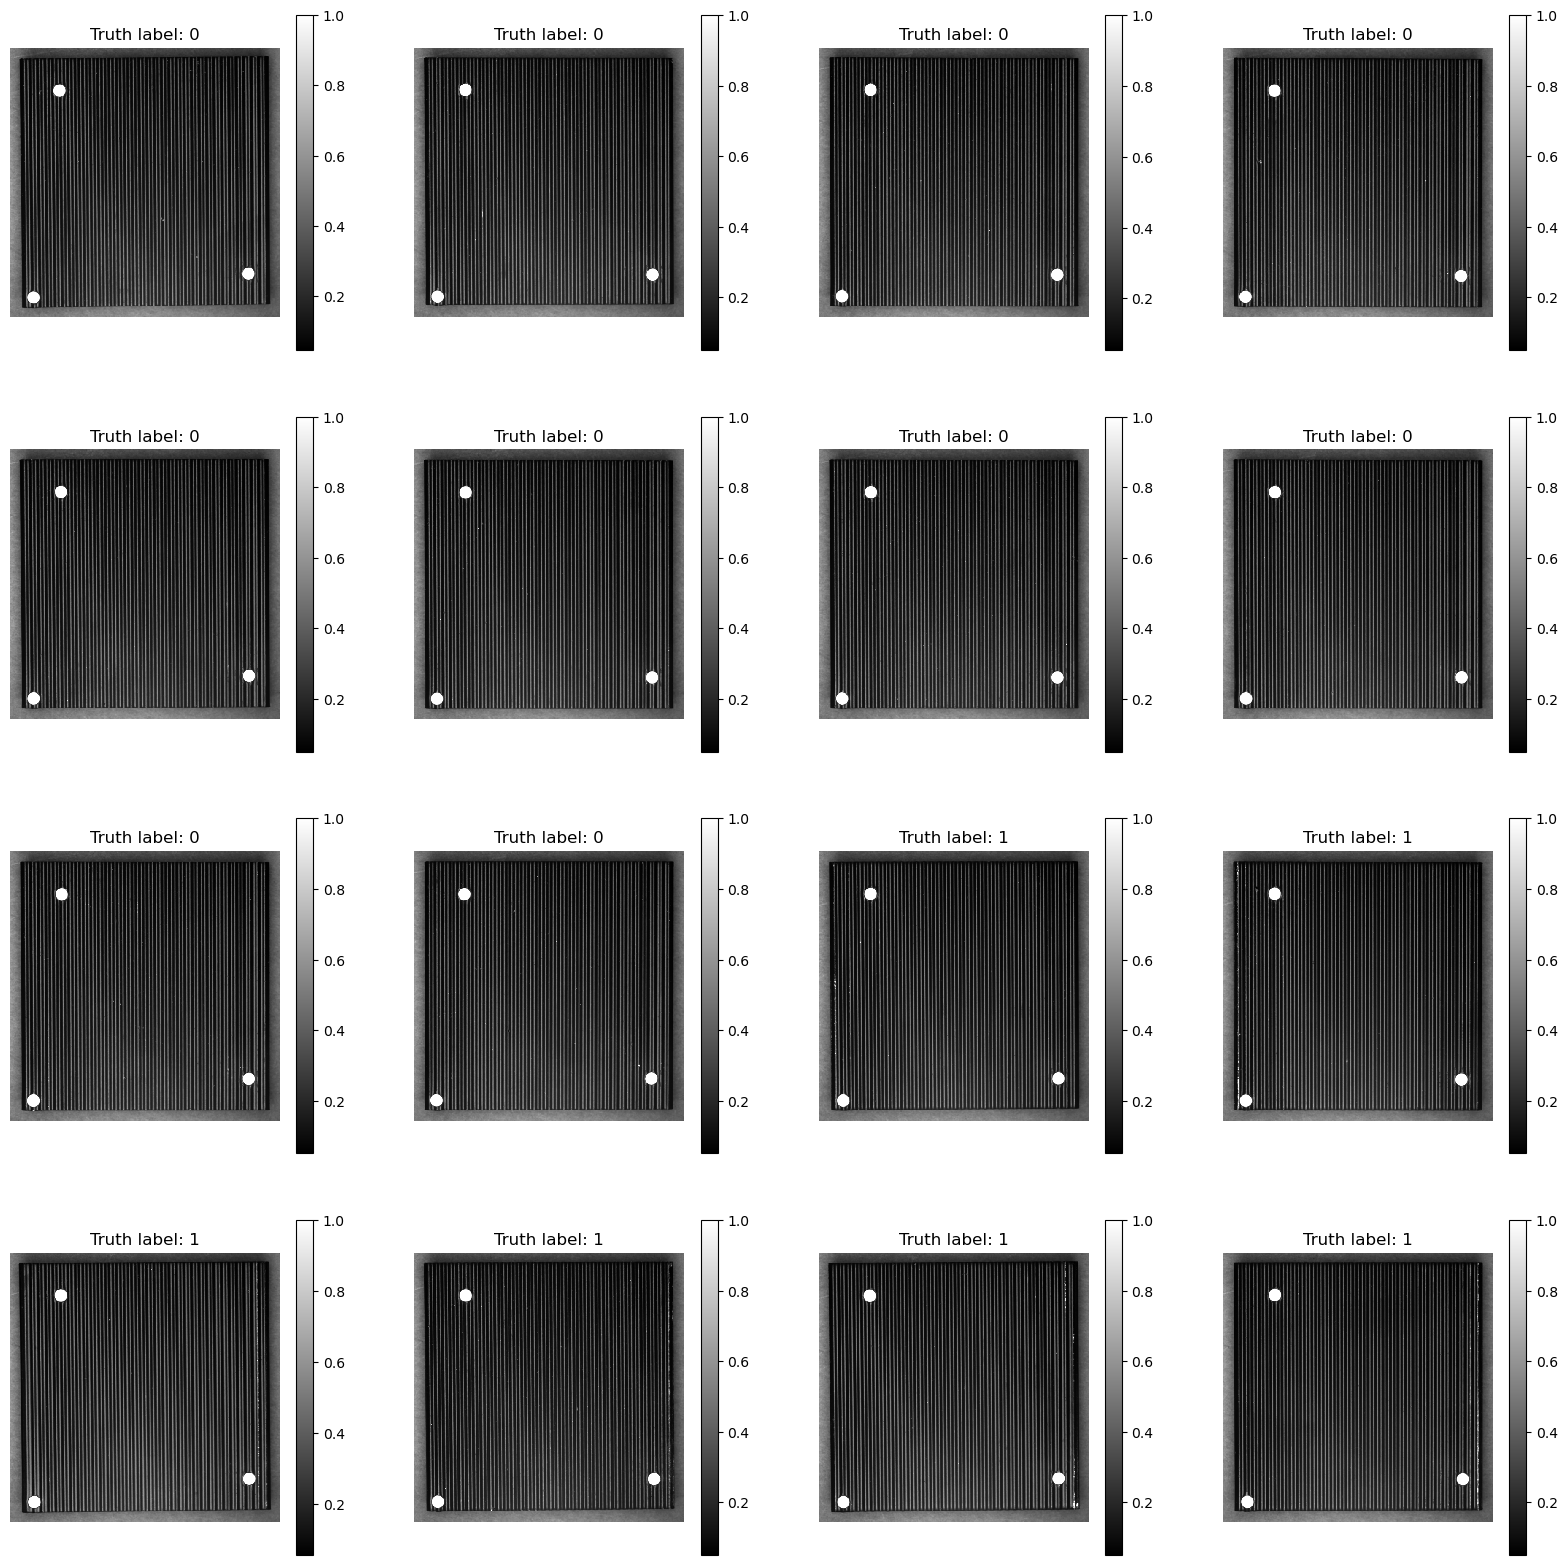

In [15]:
# Visualize the test samples
print("Show the images in the test set:")
fig,axes = plt.subplots(nrows = 4,ncols = 4, figsize= (20,20))
for r in range(4):
    for c in range(4):
        index = r*4 + c
        axes[r,c].set_axis_off()
        image = X_test_2[index].reshape((width_2,height_2))
        true_label = label_test_2[index]
        photo = axes[r,c].imshow(image, cmap = 'gray', interpolation = "nearest")
        axes[r,c].set_title(f"Truth label: {true_label}")
        cbar = fig.colorbar(photo)

## 1. Task 1: Loading the trained models

### 1.1. Loading the trained model "best_model_cnn_DCV81_224_3_1.h5"

In [17]:
# !!!!! Replace the directory below by the directory to the best_model in your computer!
dir_model_1 = "/Users/user/Victor2023/Trained_models/best_model_cnn_DCV81_224_3_1.h5"
loaded_model_1 = keras.models.load_model(dir_model_1,compile=False)

### 1.2. Loading the trained model "best_model_cnn_DCV81_640_3_1.h5"

In [18]:
# !!!!! Replace the directory below by the directory to the best_model in your computer!
dir_model_2 = "/Users/user/Victor2023/Trained_models/best_model_cnn_DCV81_640_3_1.h5"
loaded_model_2 = keras.models.load_model(dir_model_2,compile=False)

### 1.3. Loading the trained model "best_model_cnn_DCV81_640_5_1.h5"

In [19]:
# !!!!! Replace the directory below by the directory to the best_model in your computer!
dir_model_3 = "/Users/user/Victor2023/Trained_models/best_model_cnn_DCV81_640_5_1.h5"
loaded_model_3 = keras.models.load_model(dir_model_3,compile=False)

### 1.4. Loading the trained model "best_model_cnn_DCV81_640_5_2.h5"

In [20]:
# !!!!! Replace the directory below by the directory to the best_model in your computer!
dir_model_4 = "/Users/user/Victor2023/Trained_models/best_model_cnn_DCV81_640_5_2.h5"
loaded_model_4 = keras.models.load_model(dir_model_4,compile=False)

### 1.5. Predict the label (which class) for each input image in the testset by the different loaded models

In [21]:
# Predict on the test set by the model 1
output_test_1 = loaded_model_1.predict(X_test_1)
# Predict on the test set by the model 2
output_test_2 = loaded_model_2.predict(X_test_2)
# Predict on the test set by the model 3
output_test_3 = loaded_model_3.predict(X_test_2)
# Predict on the test set by the model 4
output_test_4 = loaded_model_4.predict(X_test_2)

1/1 [==============================] - 0s 398ms/step


In [25]:
output_test_1.shape

(16, 2)

In [26]:
pred_test_1 = np.argmax(output_test_1,axis=-1)
pred_test_2 = np.argmax(output_test_2,axis=-1)
pred_test_3 = np.argmax(output_test_3,axis=-1)
pred_test_4 = np.argmax(output_test_4,axis=-1)

In [27]:
print(pred_test_1.shape)

(16,)


## 1.6. Visualize the result of prediction on the test set

#### !!!! Warning pred ,truth, 0 ,1 ??????

Show the result on the test set by the model 1:


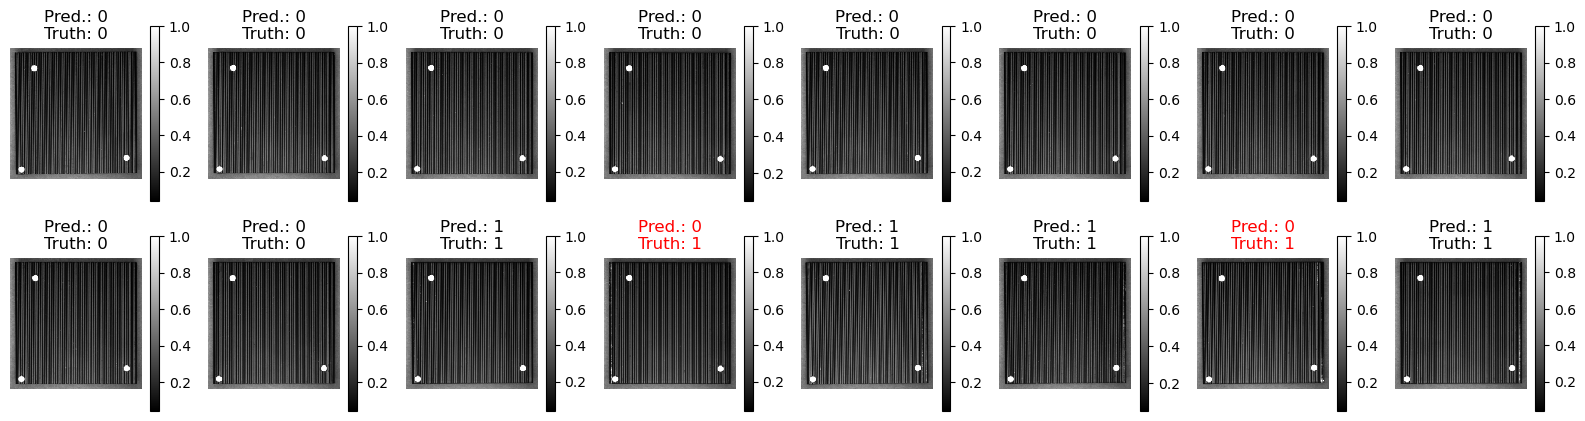

In [29]:
# Visualize the test samples and show their predicted result in the title.
print("Show the result on the test set by the model 1:")
fig,axes = plt.subplots(nrows = 2,ncols = 8, figsize= (20,5))
for r in range(2):
    for c in range(8):
        index = r*8 + c
        axes[r,c].set_axis_off()
        image = X_test_1[index].reshape((width_1,height_1))
        pred_label = pred_test_1[index]
        true_label = label_test_1[index]
        photo = axes[r,c].imshow(image, cmap = 'gray', interpolation = "nearest")
        if pred_label == true_label:
            axes[r,c].set_title(f"Pred.: {pred_label}\nTruth: {true_label}")
        else:
            axes[r,c].set_title(f"Pred.: {pred_label}\nTruth: {true_label}",color = 'red')
        cbar = fig.colorbar(photo)

Show the result on the test set by the model 2:


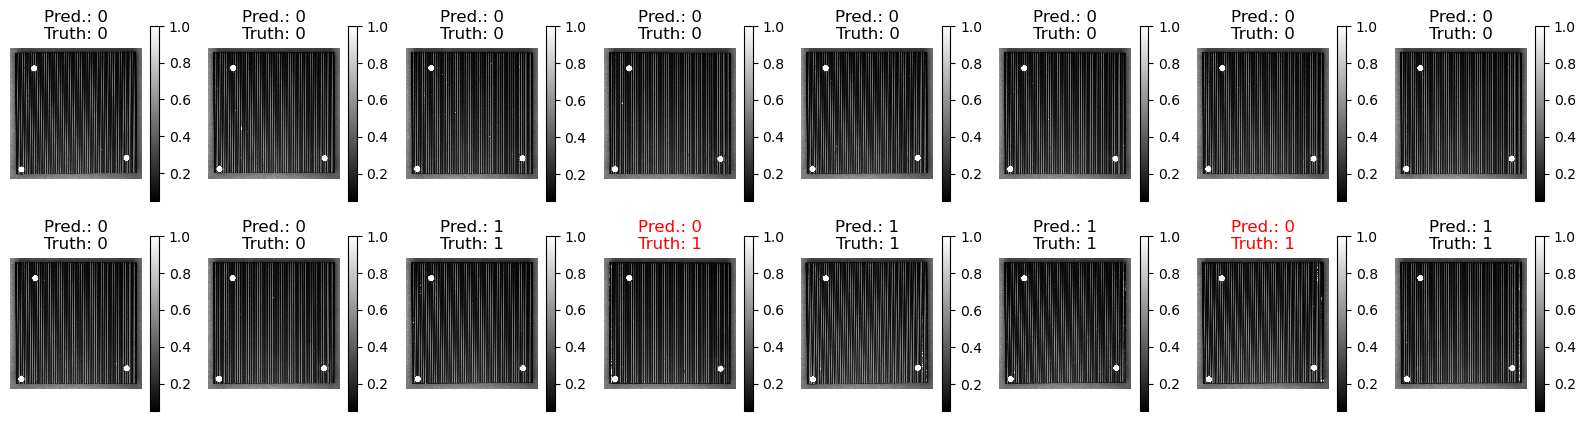

In [30]:
# Visualize the test samples and show their predicted result in the title.
print("Show the result on the test set by the model 2:")
fig,axes = plt.subplots(nrows = 2,ncols = 8, figsize= (20,5))
for r in range(2):
    for c in range(8):
        index = r*8 + c
        axes[r,c].set_axis_off()
        image = X_test_2[index].reshape((width_2,height_2))
        pred_label = pred_test_2[index]
        true_label = label_test_2[index]
        photo = axes[r,c].imshow(image, cmap = 'gray', interpolation = "nearest")
        if pred_label == true_label:
            axes[r,c].set_title(f"Pred.: {pred_label}\nTruth: {true_label}")
        else:
            axes[r,c].set_title(f"Pred.: {pred_label}\nTruth: {true_label}",color = 'red')
        cbar = fig.colorbar(photo)

## 2. Taks 2: Showing the feature images which is obtained under the convolutional layers

### 2.1. Prepare data to visualize the feature images

In [34]:
# Get the list images path and list labels visualize data
visualize_dir = "/Users/user/Victor2023/visualize_images"
list_imgs_visualize,list_labels_visualize = get_all_img_label_path(input_dir=visualize_dir,
                                                    img_suffix='.bmp')

In [36]:

X_visual_1,label_visual_1 = get_data(list_img_paths=list_imgs_visualize,
               list_labels=list_labels_visualize,
               is_resize=True,
               width=width_1,
               height= height_1)
# Reshape to the standard form
n_visual_1 = X_visual_1.shape[0]
X_visual_1 = X_visual_1.reshape((n_visual_1,height_1,width_1,n_channels))
X_visual_1 = X_visual_1/255
y_visual_1 = to_categorical(label_visual_1)

In [ ]:
print

In [42]:
X_visual_2,label_visual_2 = get_data(list_img_paths=list_imgs_visualize,
               list_labels=list_labels_visualize,
               is_resize=True,
               width=width_2,
               height= height_2)
# Reshape to the standard form
n_visual_2 = X_visual_2.shape[0]
X_visual_2 = X_visual_2.reshape((n_visual_2,height_2,width_2,n_channels))
X_visual_2 = X_visual_2/255
y_visual_2 = to_categorical(label_visual_2)

### warning 0????

Show the images:


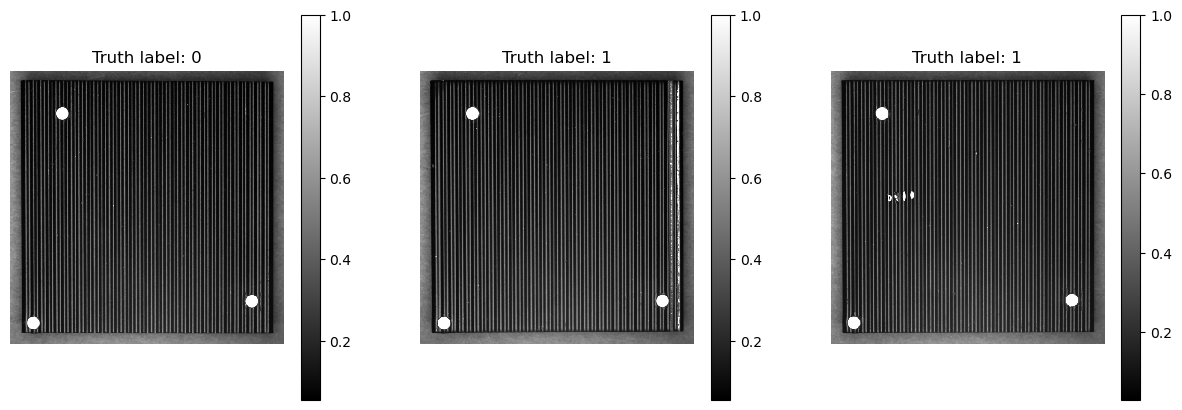

In [47]:
print("Show the images:")

fig,axes = plt.subplots(nrows = 1,ncols = 3, figsize= (15,5))
for c in range(3):
    index = c
    axes[c].set_axis_off()
    image = X_visual_2[index].reshape((width_2,height_2))
    true_label = label_visual_2[index]
    photo = axes[c].imshow(image, cmap = 'gray', interpolation = "nearest")
    axes[c].set_title(f"Truth label: {true_label}")
    cbar = fig.colorbar(photo)
       

## 2.2. Exploring the convolutional layers inside trained models

In [55]:
def visualize_feature(model,input_img,index_img,index_layer):
    layer_to_visualize = Model(inputs = model.inputs,outputs=model.layers[index_layer].output)
    feature_results = layer_to_visualize.predict(input_img)

    f_max = feature_results.max()
    f_min = feature_results.min()
    fig,axes = plt.subplots(nrows = 4,ncols = 8, figsize= (20,10))
    for r in range(4):
        for c in range(8):
            index = r*8 + c
            axes[r,c].set_axis_off()
            photo = axes[r,c].imshow(feature_results[index_img,:,:,index], cmap = 'gray',vmin = f_min,vmax = f_max, interpolation = "nearest")
            axes[r,c].set_title(f"Feature: {index}")
            cbar = fig.colorbar(photo)

### 2.2.1 Visualize the 32 feature maps after the first conv2d of the Model 1:

Visualize the 32 feature maps after the first conv2d of model 1:
Show the feature maps of image in the good class
1/1 [==============================] - 0s 142ms/step


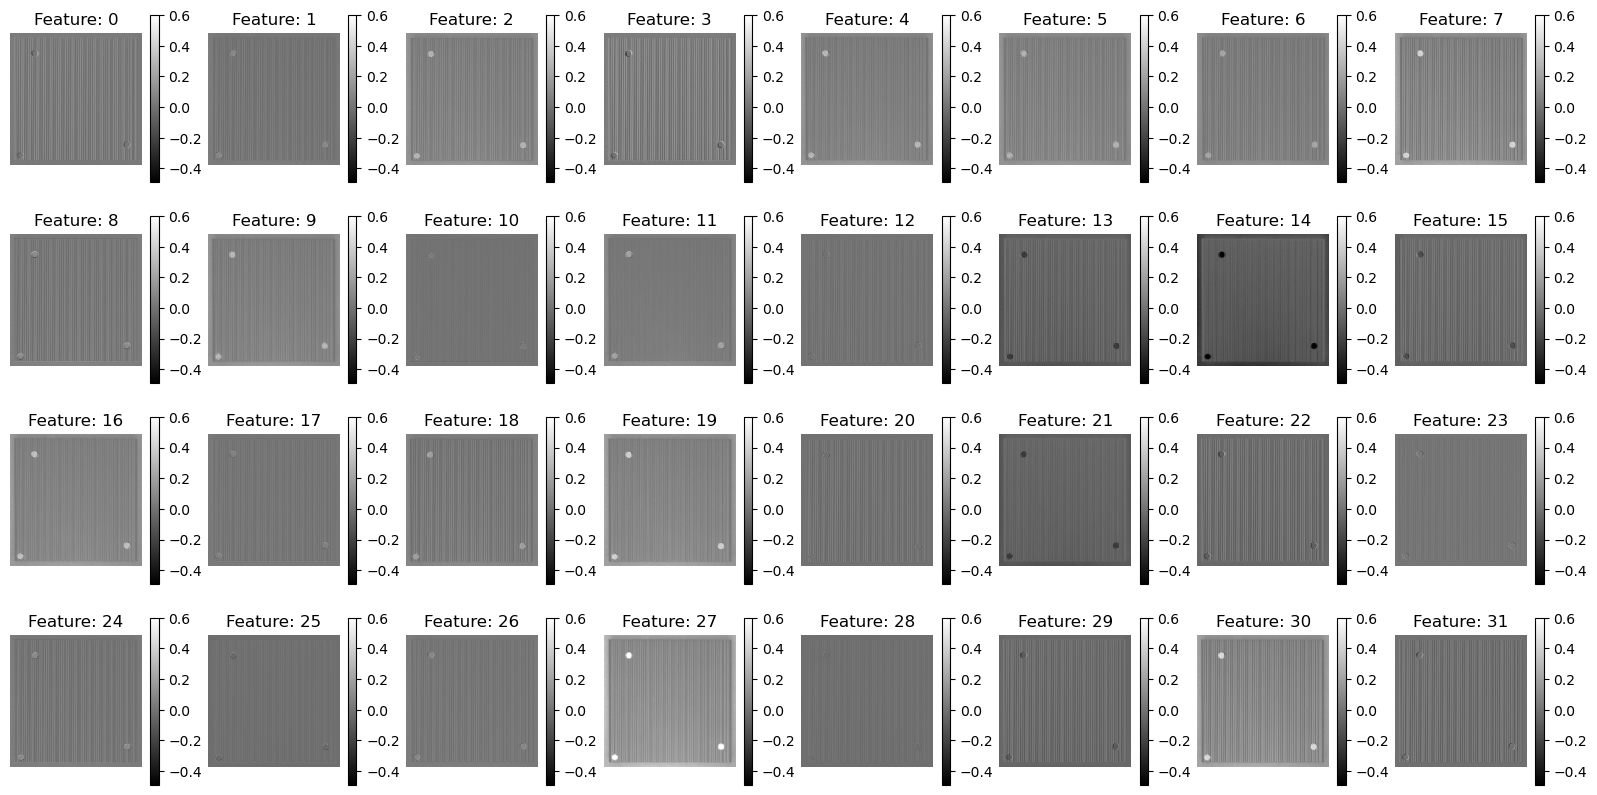

In [62]:
print("Visualize the 32 feature maps after the first conv2d of model 1:")
print("Show the feature maps of image in the good class")
index_img = 0
visualize_feature(model=loaded_model_1,input_img=X_visual_1[:,:,:,:],index_img=index_img,index_layer=0)

Different kernels generate different features ???????????

Visualize the 32 feature maps under the first conv2d of model 1:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 88ms/step


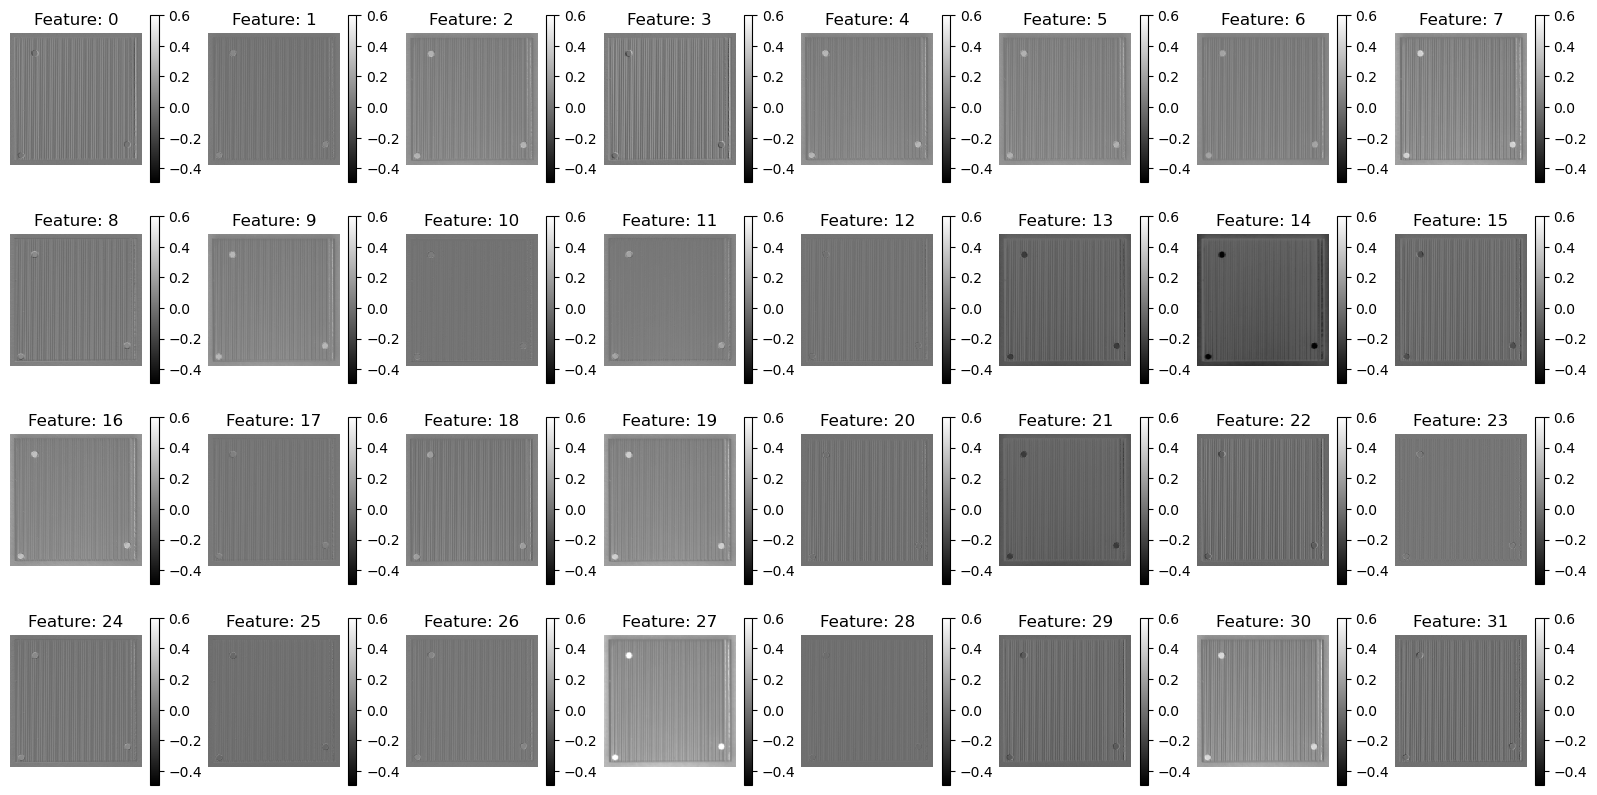

In [63]:
print("Visualize the 32 feature maps under the first conv2d of model 1:")
print("Show the feature maps of image in the defect class")
index_img = 1
visualize_feature(model=loaded_model_1,input_img=X_visual_1[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 1:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 127ms/step


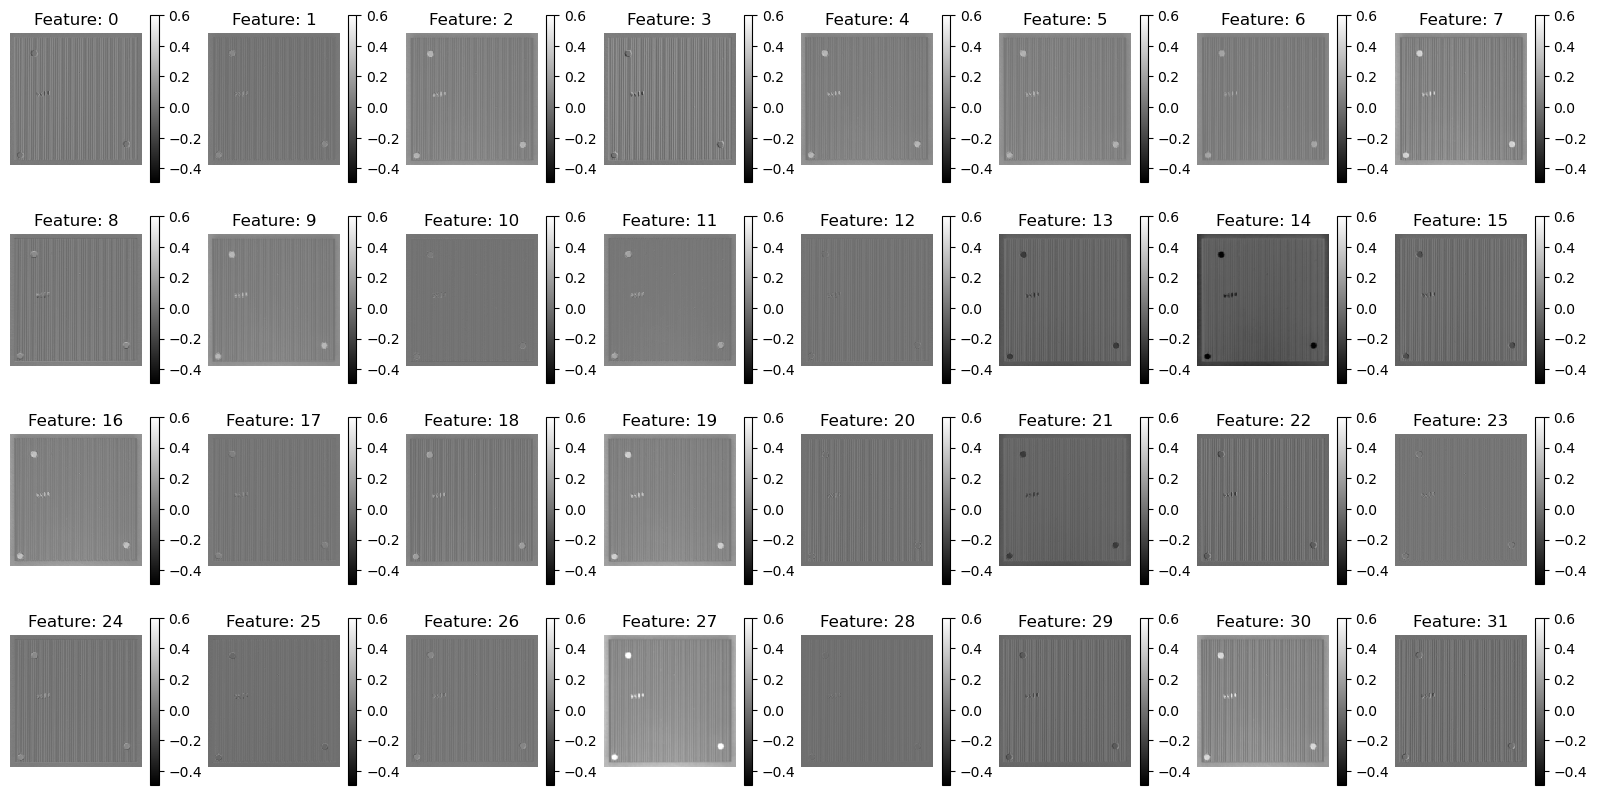

In [64]:
print("Visualize the 32 feature maps under the first conv2d of model 1:")
print("Show the feature maps of image in the defect class")
index_img = 2
visualize_feature(model=loaded_model_1,input_img=X_visual_1[:,:,:,:],index_img=index_img,index_layer=0)

### 2.2.2. Visualize the 32 feature maps after the first conv2d of the Model 2:

Visualize the 32 feature maps after the first conv2d of model 2:
Show the feature maps of image in the good class
1/1 [==============================] - 0s 383ms/step


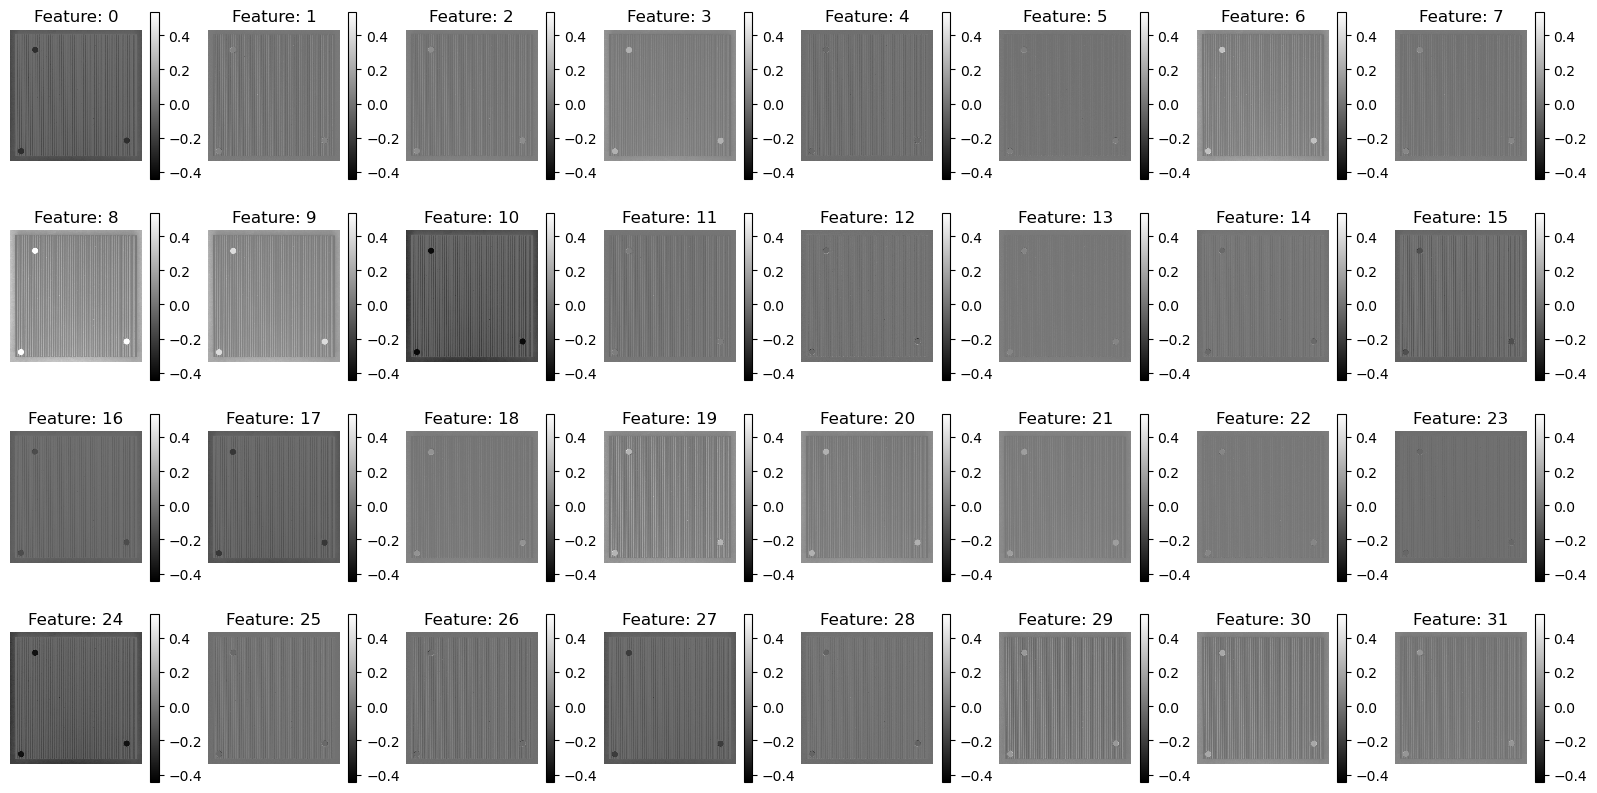

In [65]:
print("Visualize the 32 feature maps after the first conv2d of model 2:")
print("Show the feature maps of image in the good class")
index_img = 0
visualize_feature(model=loaded_model_2,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 2:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 192ms/step


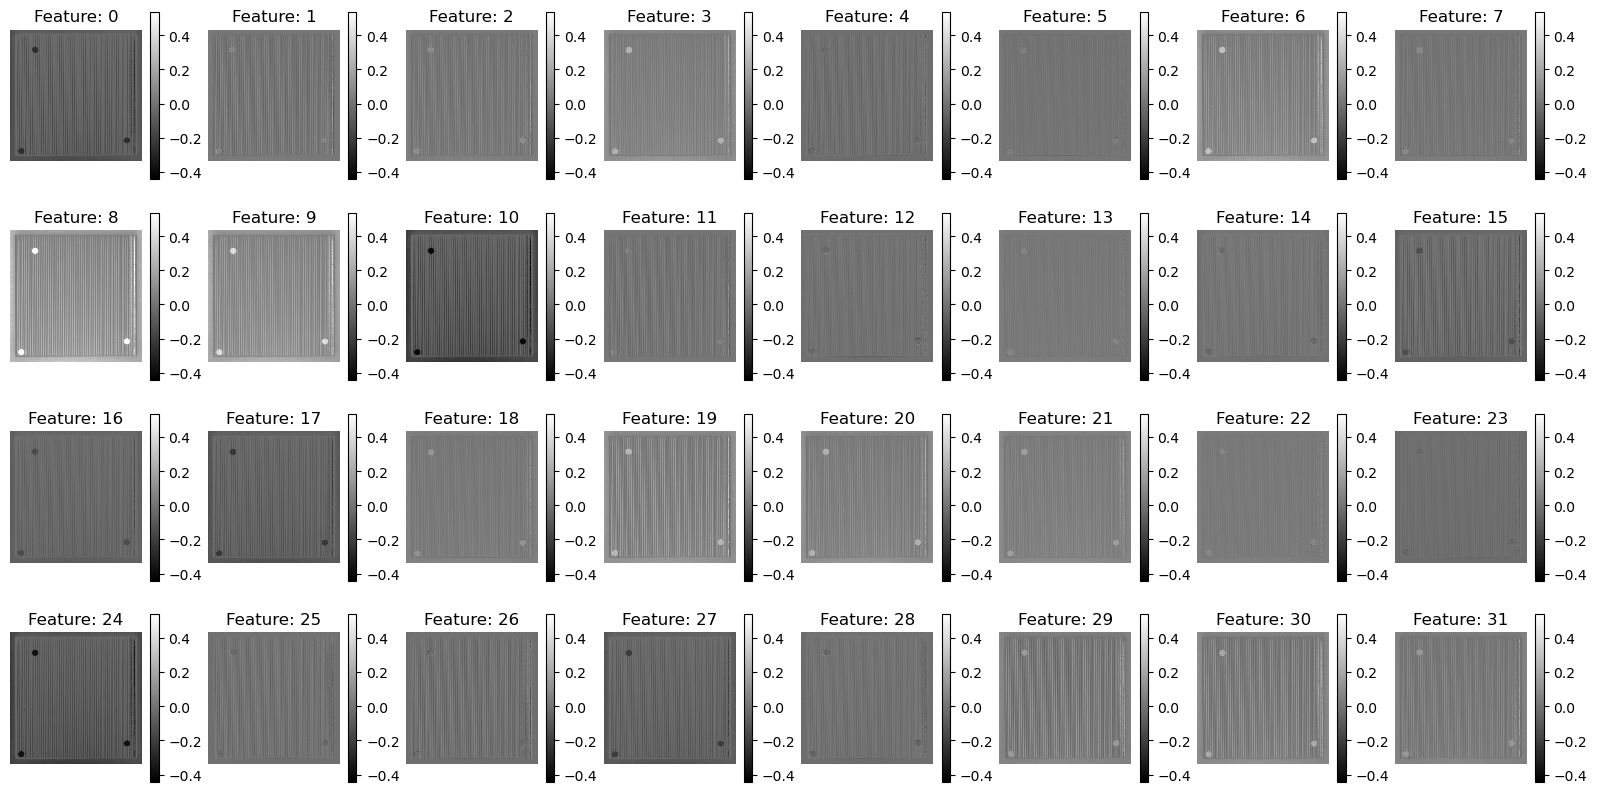

In [66]:
print("Visualize the 32 feature maps under the first conv2d of model 2:")
print("Show the feature maps of image in the defect class")
index_img = 1
visualize_feature(model=loaded_model_2,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 2:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 320ms/step


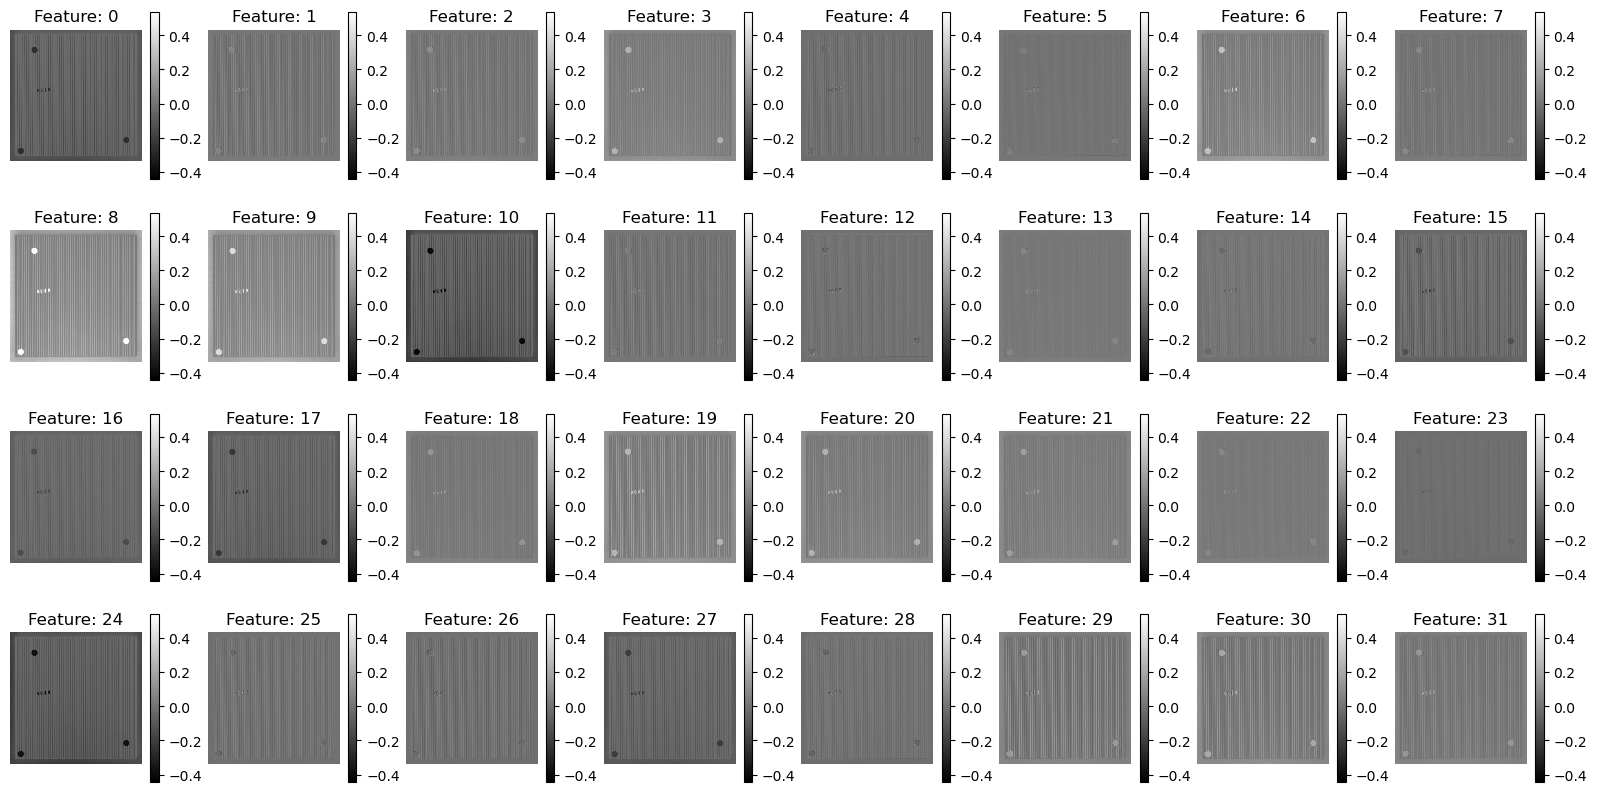

In [67]:
print("Visualize the 32 feature maps under the first conv2d of model 2:")
print("Show the feature maps of image in the defect class")
index_img = 2
visualize_feature(model=loaded_model_2,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

### 2.2.3. Visualize the 32 feature maps after the first conv2d of the Model 3:

Visualize the 32 feature maps after the first conv2d of model 3:
Show the feature maps of image in the good class
1/1 [==============================] - 0s 403ms/step


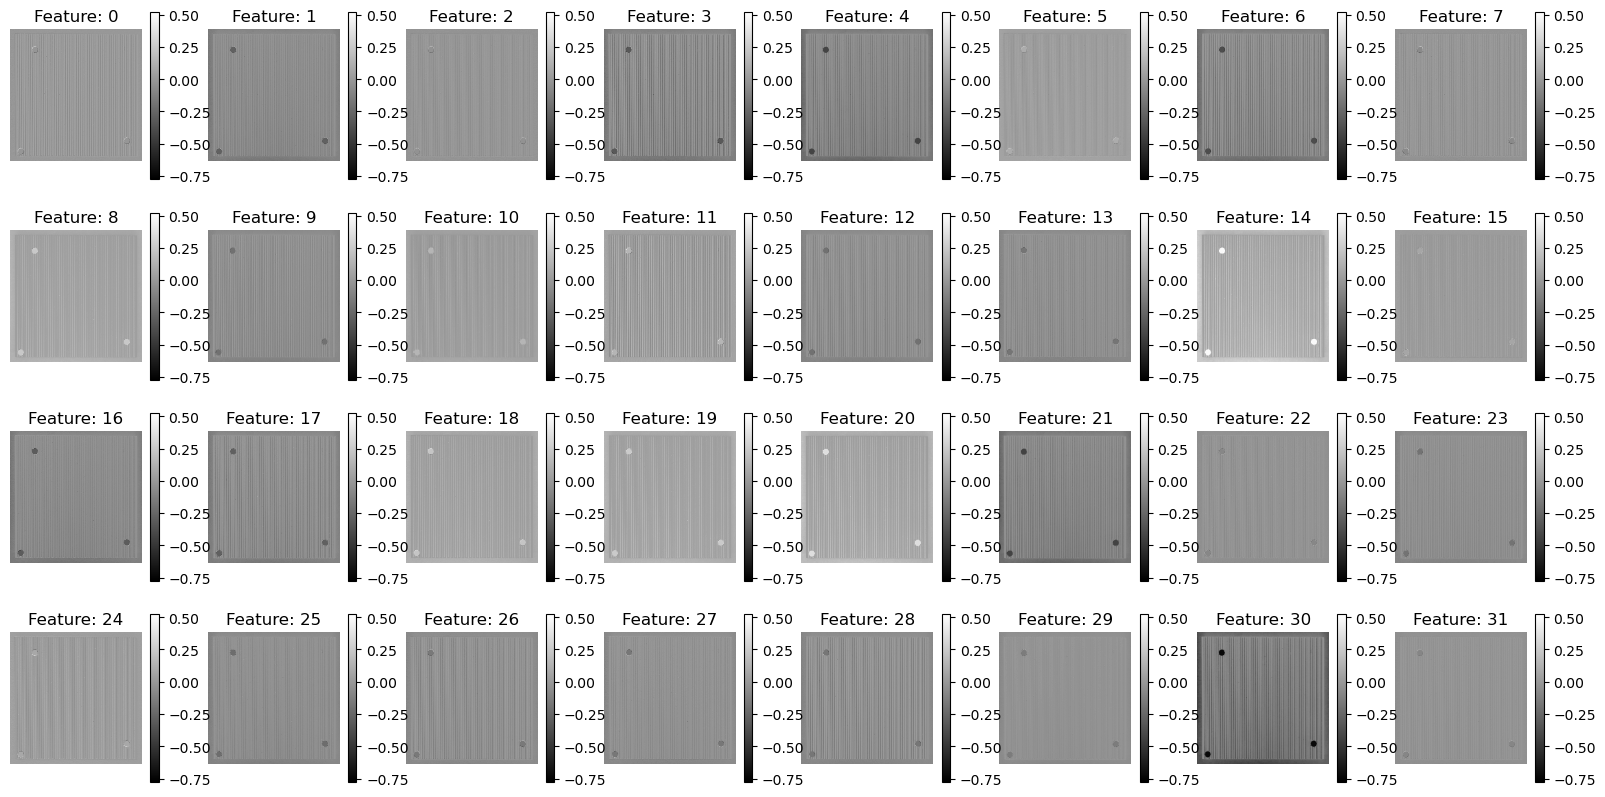

In [68]:
print("Visualize the 32 feature maps after the first conv2d of model 3:")
print("Show the feature maps of image in the good class")
index_img = 0
visualize_feature(model=loaded_model_3,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 3:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 487ms/step


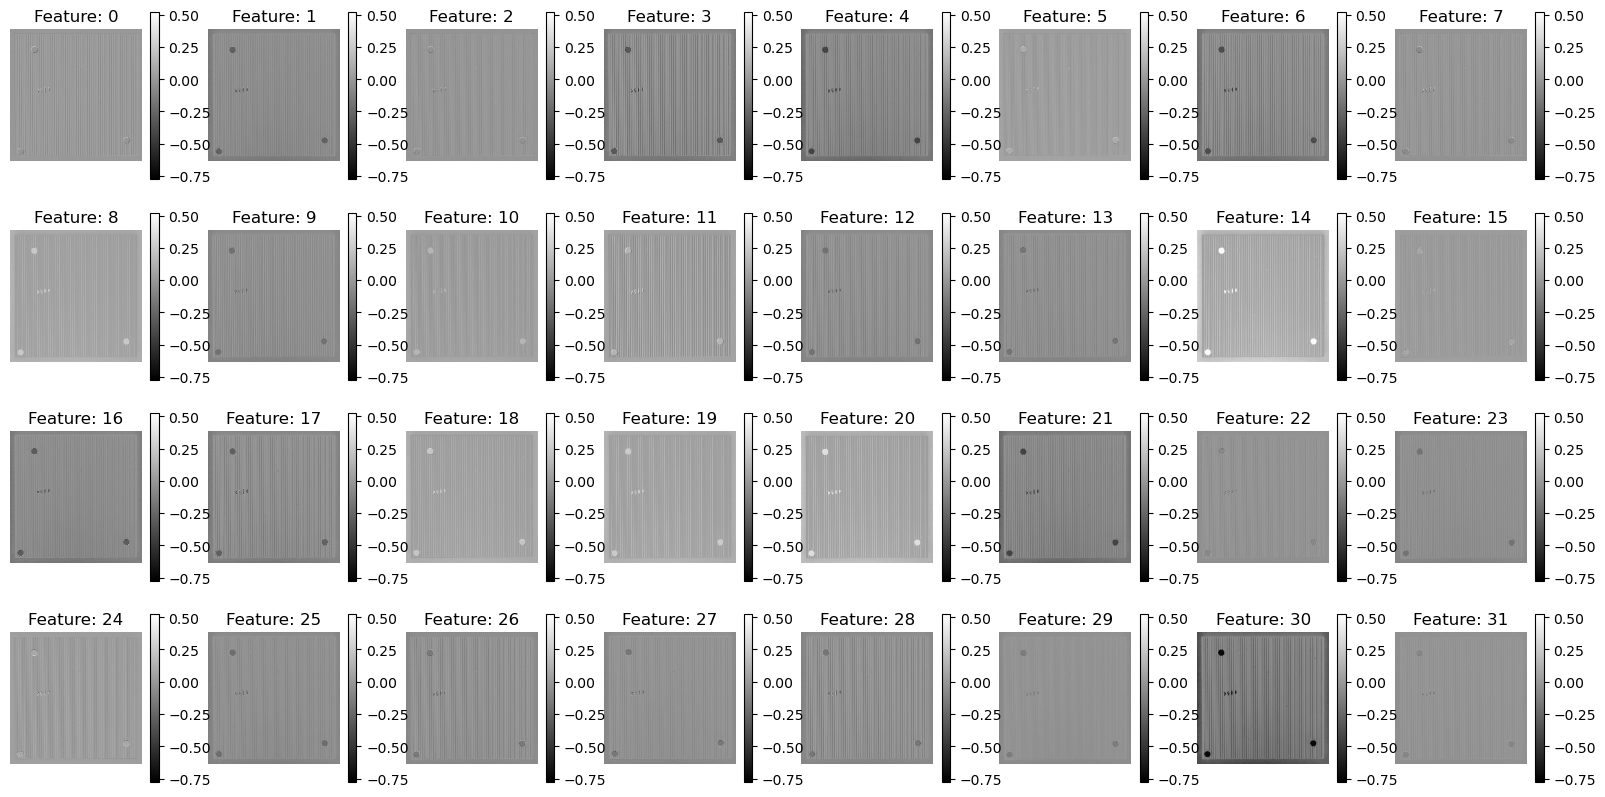

In [69]:
print("Visualize the 32 feature maps under the first conv2d of model 3:")
print("Show the feature maps of image in the defect class")
index_img = 2
visualize_feature(model=loaded_model_3,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

### 2.2.4. Visualize the 32 feature maps after the first conv2d of the Model 4:

Visualize the 32 feature maps after the first conv2d of model 2:
Show the feature maps of image in the good class
1/1 [==============================] - 0s 143ms/step


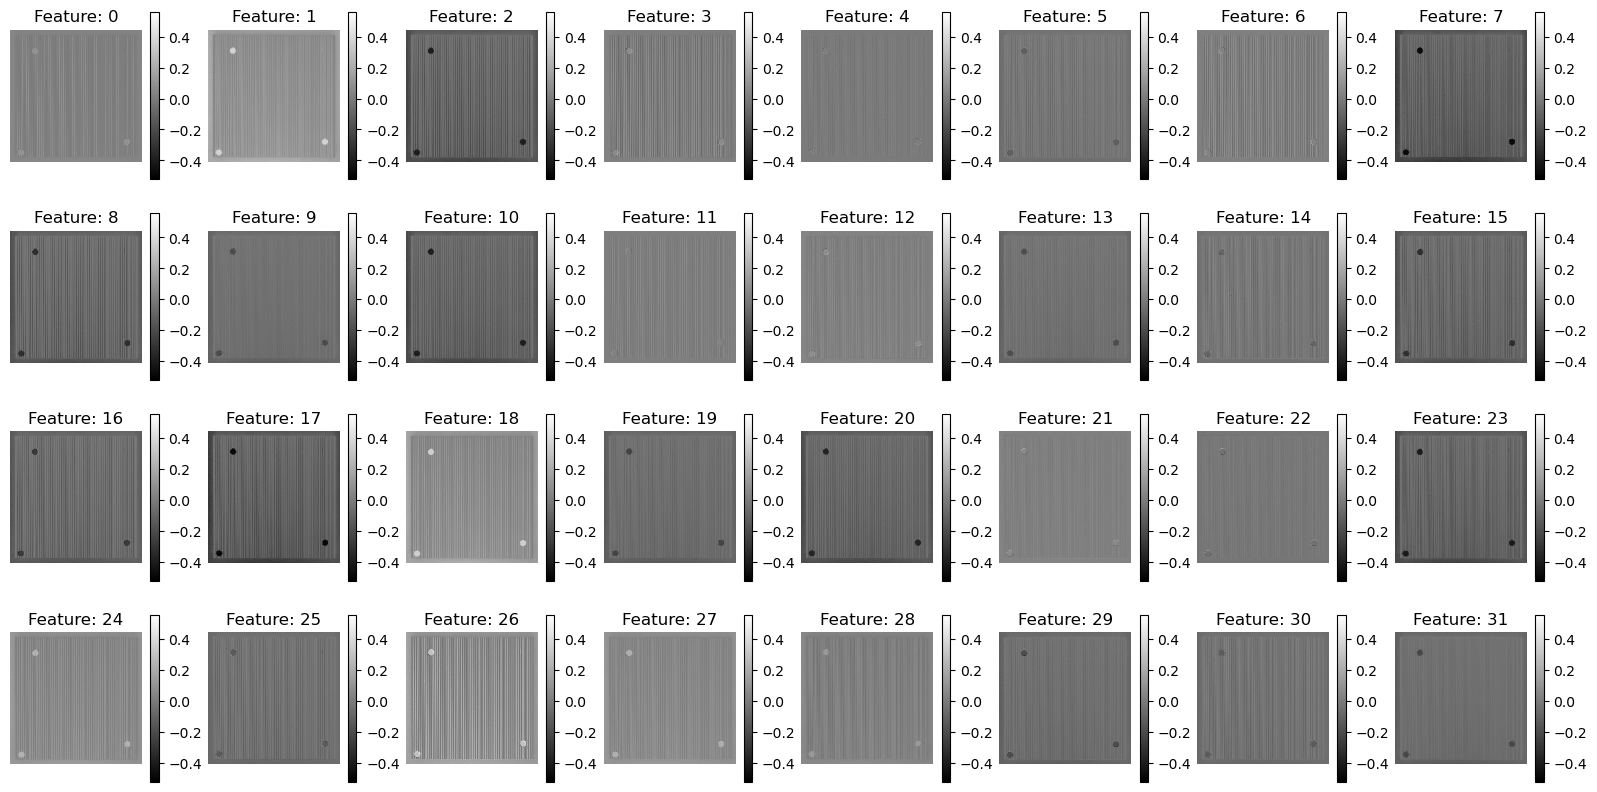

In [70]:
print("Visualize the 32 feature maps after the first conv2d of model 2:")
print("Show the feature maps of image in the good class")
index_img = 0
visualize_feature(model=loaded_model_4,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 3:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 110ms/step


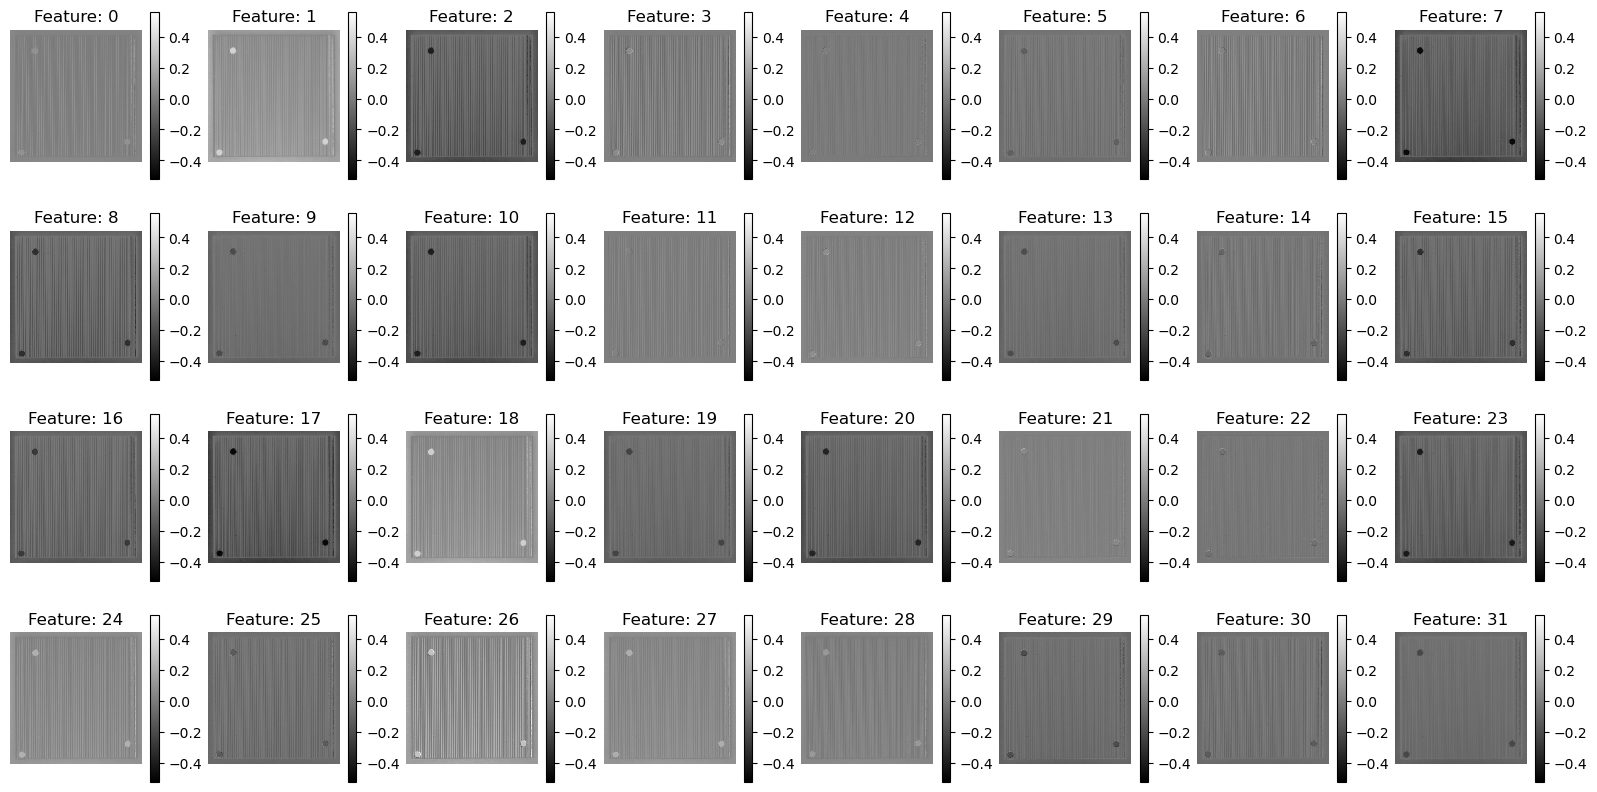

In [71]:
print("Visualize the 32 feature maps under the first conv2d of model 3:")
print("Show the feature maps of image in the defect class")
index_img = 1
visualize_feature(model=loaded_model_4,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)

Visualize the 32 feature maps under the first conv2d of model 3:
Show the feature maps of image in the defect class
1/1 [==============================] - 0s 375ms/step


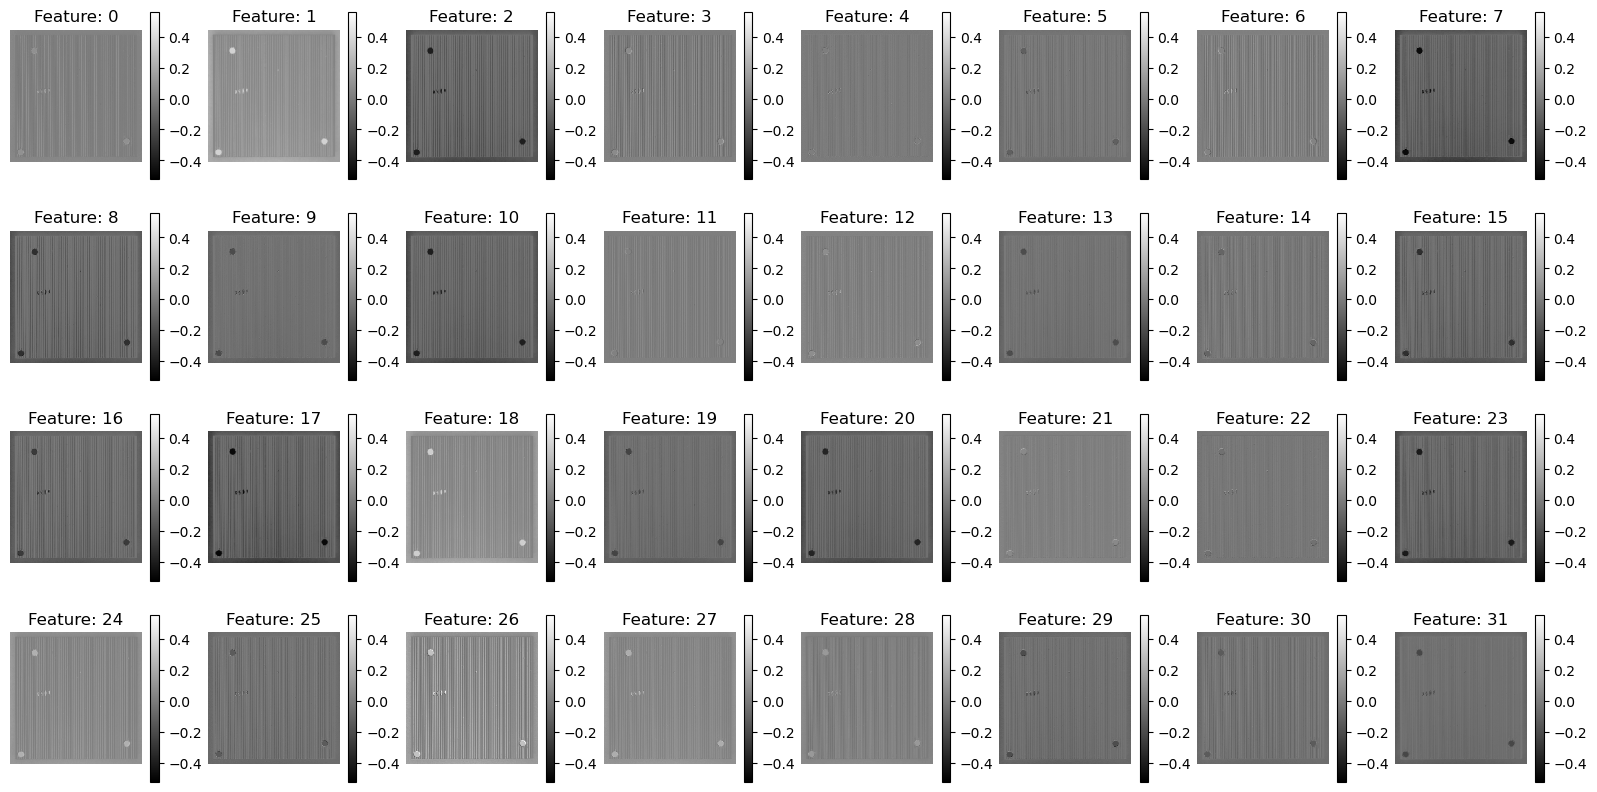

In [75]:
print("Visualize the 32 feature maps under the first conv2d of model 3:")
print("Show the feature maps of image in the defect class")
index_img = 2
visualize_feature(model=loaded_model_4,input_img=X_visual_2[:,:,:,:],index_img=index_img,index_layer=0)